In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv('/content/heart_missing.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0.0,125,212,0.0,1.0,168,0,1.0,2,2,3,0
1,53,1,0.0,140,203,1.0,0.0,155,1,3.1,0,0,3,0
2,70,1,0.0,145,174,0.0,1.0,125,1,2.6,0,0,3,0
3,61,1,0.0,148,203,0.0,1.0,161,0,0.0,2,1,3,0
4,62,0,0.0,138,294,1.0,1.0,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1.0,140,221,0.0,1.0,164,1,0.0,2,0,2,1
1021,60,1,0.0,125,258,0.0,0.0,141,1,2.8,1,1,3,0
1022,47,1,0.0,110,275,0.0,0.0,118,1,1.0,1,1,2,0
1023,50,0,0.0,110,254,0.0,0.0,159,0,0.0,2,0,2,1


In [2]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0.0,125,212,0.0,1.0,168,0,1.0,2,2,3,0
1,53,1,0.0,140,203,1.0,0.0,155,1,3.1,0,0,3,0
2,70,1,0.0,145,174,0.0,1.0,125,1,2.6,0,0,3,0
3,61,1,0.0,148,203,0.0,1.0,161,0,0.0,2,1,3,0
4,62,0,0.0,138,294,1.0,1.0,106,0,1.9,1,3,2,0


In [3]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1.0,140,221,0.0,1.0,164,1,0.0,2,0,2,1
1021,60,1,0.0,125,258,0.0,0.0,141,1,2.8,1,1,3,0
1022,47,1,0.0,110,275,0.0,0.0,118,1,1.0,1,1,2,0
1023,50,0,0.0,110,254,0.0,0.0,159,0,0.0,2,0,2,1
1024,54,1,0.0,120,188,0.0,1.0,113,0,1.4,1,1,3,0


In [4]:
df.isna().sum()

age          0
sex          0
cp           7
trestbps     0
chol         0
fbs         13
restecg      4
thalach      0
exang        0
oldpeak     11
slope        0
ca           0
thal         0
target       0
dtype: int64

In [5]:
m=df['cp'].mean()
df['cp'].fillna(m,inplace=True)
df.isna().sum()


age          0
sex          0
cp           0
trestbps     0
chol         0
fbs         13
restecg      4
thalach      0
exang        0
oldpeak     11
slope        0
ca           0
thal         0
target       0
dtype: int64

In [6]:
m=df['fbs'].mean()
df['fbs'].fillna(m,inplace=True)
df.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      4
thalach      0
exang        0
oldpeak     11
slope        0
ca           0
thal         0
target       0
dtype: int64

In [7]:
m=df['restecg'].mean()
df['restecg'].fillna(m,inplace=True)
df.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak     11
slope        0
ca           0
thal         0
target       0
dtype: int64

In [8]:
m=df['oldpeak'].mean()
df['oldpeak'].fillna(m,inplace=True)
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.dtypes

age           int64
sex           int64
cp          float64
trestbps      int64
chol          int64
fbs         float64
restecg     float64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [10]:
x=df.iloc[:,:-1].values
x

array([[52.,  1.,  0., ...,  2.,  2.,  3.],
       [53.,  1.,  0., ...,  0.,  0.,  3.],
       [70.,  1.,  0., ...,  0.,  0.,  3.],
       ...,
       [47.,  1.,  0., ...,  1.,  1.,  2.],
       [50.,  0.,  0., ...,  2.,  0.,  2.],
       [54.,  1.,  0., ...,  1.,  1.,  3.]])

In [11]:
y=df.iloc[:,-1].values
y

array([0, 0, 0, ..., 0, 1, 0])

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=2)
x_train

array([[70.,  1.,  1., ...,  2.,  0.,  2.],
       [44.,  1.,  2., ...,  2.,  0.,  2.],
       [48.,  1.,  0., ...,  2.,  0.,  2.],
       ...,
       [55.,  1.,  0., ...,  1.,  1.,  3.],
       [55.,  1.,  0., ...,  1.,  1.,  3.],
       [62.,  0.,  0., ...,  2.,  0.,  2.]])

In [13]:
x_test

array([[70.,  1.,  0., ...,  1.,  3.,  2.],
       [57.,  1.,  0., ...,  1.,  0.,  1.],
       [62.,  1.,  0., ...,  1.,  2.,  3.],
       ...,
       [42.,  1.,  2., ...,  2.,  0.,  2.],
       [67.,  0.,  2., ...,  2.,  1.,  2.],
       [59.,  1.,  0., ...,  2.,  0.,  2.]])

In [14]:
y_train

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
x_train

array([[ 1.72406696,  0.66750619,  0.07816913, ...,  0.96046731,
        -0.71377425, -0.51299853],
       [-1.15045735,  0.66750619,  1.07360017, ...,  0.96046731,
        -0.71377425, -0.51299853],
       [-0.70822284,  0.66750619, -0.91726191, ...,  0.96046731,
        -0.71377425, -0.51299853],
       ...,
       [ 0.06568755,  0.66750619, -0.91726191, ..., -0.65989754,
         0.25549874,  1.10024684],
       [ 0.06568755,  0.66750619, -0.91726191, ..., -0.65989754,
         0.25549874,  1.10024684],
       [ 0.83959794, -1.49811344, -0.91726191, ...,  0.96046731,
        -0.71377425, -0.51299853]])

In [16]:
x_test

array([[ 1.72406696,  0.66750619, -0.91726191, ..., -0.65989754,
         2.19404472, -0.51299853],
       [ 0.28680481,  0.66750619, -0.91726191, ..., -0.65989754,
        -0.71377425, -2.12624389],
       [ 0.83959794,  0.66750619, -0.91726191, ..., -0.65989754,
         1.22477173,  1.10024684],
       ...,
       [-1.3715746 ,  0.66750619,  1.07360017, ...,  0.96046731,
        -0.71377425, -0.51299853],
       [ 1.39239108, -1.49811344,  1.07360017, ...,  0.96046731,
         0.25549874, -0.51299853],
       [ 0.50792206,  0.66750619, -0.91726191, ...,  0.96046731,
        -0.71377425, -0.51299853]])

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
y_pred

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,

In [18]:
y_test

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,

In [19]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[140  24]
 [ 16 128]]


In [20]:
score=accuracy_score(y_test,y_pred)
score

0.8701298701298701

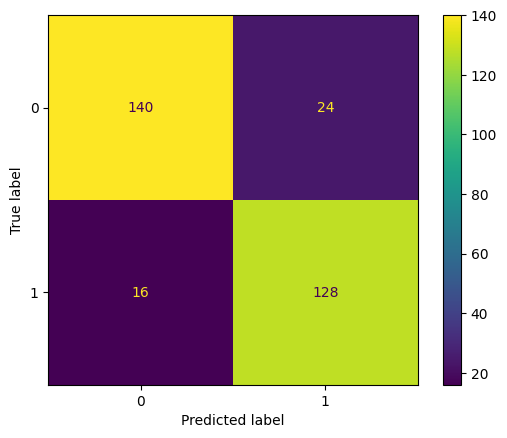

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay
labels=[0,1]
cmd=ConfusionMatrixDisplay(cm,display_labels=labels)
cmd.plot()